# **Binary Optimization Problem: Facility Location**

**Author: Jason Emmanuel**

Binary optimization is a type of optimization problem where the decision variables can only take on binary values, typically 0 or 1. The goal of binary optimization is to find the best combination of binary variables that optimizes a certain objective function while satisfying any given constraints.

This type of optimization is commonly encountered in various fields such as computer science, engineering, operations research, and finance. Some well-known binary optimization problems include the knapsack problem, the traveling salesman problem, and Boolean satisfiability problems.

Binary optimization algorithms often involve techniques such as greedy algorithms, dynamic programming, genetic algorithms, simulated annealing, and integer linear programming. These algorithms aim to efficiently search through the vast solution space of binary variables to find the optimal or near-optimal solution.

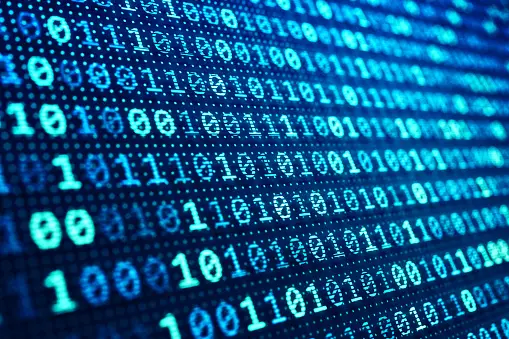

**This is the question that we are trying to solve in this project:**

**Binary Optimization Problem: Facility Location**

Background: You are a consultant working with a retail company that is planning to open new stores in a region.
The company wants to determine the optimal location for the new stores to minimize transportation costs while
ensuring that each customer is served by exactly one store. This is a binary location-allocation problem.

Data:
- There are five potential locations (L1, L2, L3, L4, L5) where the company can open new stores.

- There are 20 customers (C1, C2, ..., C20) distributed throughout the region.

- The cost of delivering products from each potential store location to each customer is given in the table
below.
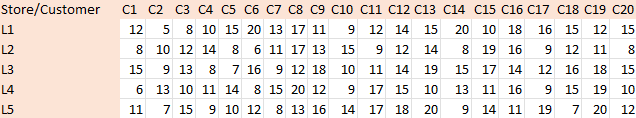

Objective: Determine the optimal locations for opening new stores to minimize the total transportation cost while
ensuring that each customer is served by exactly one store. In this binary optimization problem, you need to decide
whether to open a sore at each potential location (1 if open, 0 if not)

**Instructions:**
- Solve the binary programming model to find the optimal store locations that minimize transportation costs
‘while serving all customers exactly once.

- Clearly present the optimal store locations (whether to open a store or not at each location.

## **Answer (with Excel Solver Add-Ins)**
**Decision Variables**

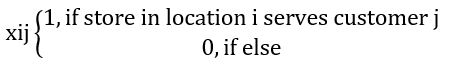


**Objective Function**

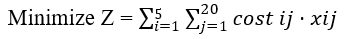

**Constraints**

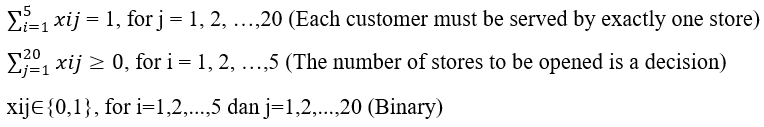

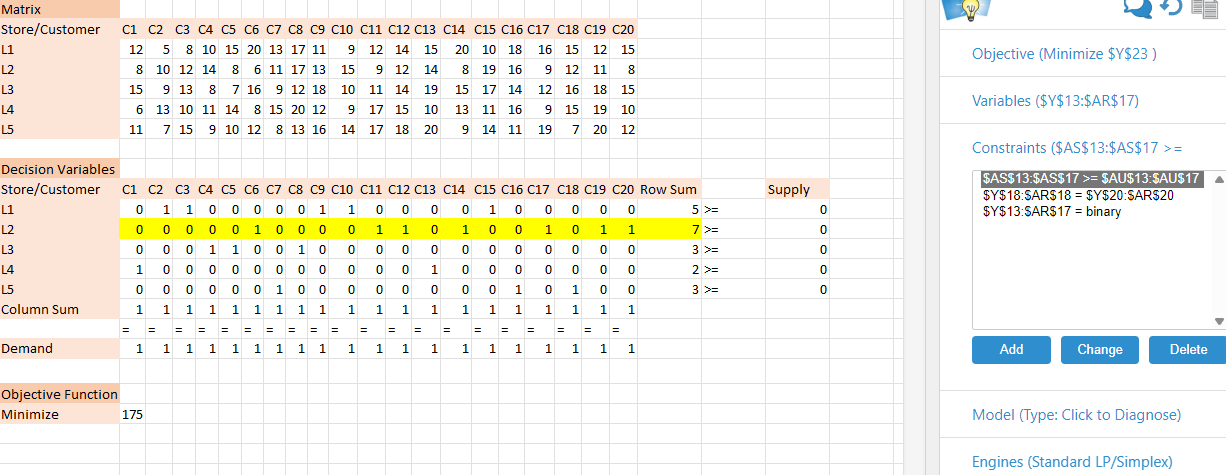

In the decision variables matrix, each row represents a potential store location, while each column represents a customer. In the context of the provided data, the row corresponding to store location L2 indicates that this particular store serves seven out of the twenty customers. This information is gleaned from the "Row Sum" section, where the total sum of binary values (1s) in the L2 row equals 7. Thus, out of the available customers, store location L2 serves seven distinct individuals. This insight underscores the significance of store location L2 in efficiently catering to a substantial portion of the customer base, contributing to the overall objective of minimizing transportation costs while effectively meeting customer demand. Through rigorous optimization, the model determines that establishing a store at location L2 yields the lowest overall transportation costs, amounting to $175.








## **Answer (with Python)**

For the first step, several crucial steps are undertaken to set up the environment for solving optimization problems in Python. Firstly, the command **!pip install pulp** is executed, which utilizes the pip package manager to install the **PuLP** library. The exclamation mark preceding the command is a notation specific to Jupyter notebooks, indicating that it should be executed as a shell command. Once **PuLP** is installed, the **import pulp** statement imports the library into the Python environment, providing access to its functionalities for creating and solving optimization models. Additionally, the **pandas** library, widely used for data manipulation and analysis, is imported with the alias **pd**. Finally, the **from IPython.display import display** statement imports the **display** function from the **IPython.display** module, enabling more visually appealing output rendering within **IPython** notebooks. Together, these steps ensure that the necessary tools are available for subsequent optimization tasks and data processing.

In [25]:
!pip install pulp
import pulp
import pandas as pd
from IPython.display import display

This code snippet initializes the necessary data structures for solving the facility location problem. It defines two lists:

- The **'customers'** list contains identifiers for each customer, from **"C1" to "C20"**.
- The **'locations'** list contains identifiers for each potential store location, from **"L1" to "L5"**.

Additionally, it initializes a dictionary named costs to store transportation costs. Each key in the costs dictionary corresponds to a store location **("L1" to "L5")**, and its value is a list representing transportation costs from that location to each customer. For instance, the list associated with **"L1"** contains transportation costs from **"L1"** to customers **"C1"** through **"C20"**, respectively. This data structure organizes the transportation costs, facilitating their access during the optimization process.

In [26]:
customers = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10",
             "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20"]
locations = ["L1", "L2", "L3", "L4", "L5"]
costs = {
    "L1": [12, 5, 8, 10, 15, 20, 13, 17, 11, 9, 12, 14, 15, 20, 10, 18, 16, 15, 12, 15],
    "L2": [8, 10, 12, 14, 8, 6, 11, 17, 13, 15, 9, 12, 14, 8, 19, 16, 9, 12, 11, 8],
    "L3": [15, 9, 13, 8, 7, 16, 9, 12, 18, 10, 11, 14, 19, 15, 17, 14, 12, 16, 18, 15],
    "L4": [6, 13, 10, 11, 14, 8, 15, 20, 12, 9, 17, 15, 10, 13, 11, 16, 9, 15, 19, 10],
    "L5": [11, 7, 15, 9, 10, 12, 8, 13, 16, 14, 17, 18, 20, 9, 14, 11, 19, 7, 20, 12]
}

This code constructs a **DataFrame** df **bold text** from the costs dictionary using **Pandas**, where each column represents a store location and each row represents a customer. It then prints a message describing the content and displays the **DataFrame** using **display()**. This provides a concise and structured view of transportation costs from each store location to every customer.

In [27]:
df = pd.DataFrame(costs, index=customers)
print("Transportation Cost Table from Each Location to Each Customer:")
display(df)

Transportation Cost Table from Each Location to Each Customer:


,L1,L2,L3,L4,L5
C1,12,8,15,6,11
C2,5,10,9,13,7
C3,8,12,13,10,15
C4,10,14,8,11,9
C5,15,8,7,14,10
C6,20,6,16,8,12
C7,13,11,9,15,8
C8,17,17,12,20,13
C9,11,13,18,12,16
C10,9,15,10,9,14


This code segment sets up and solves an optimization problem using the **PuLP** library in Python. It initializes a linear programming problem named **"Facility Location"** with the goal of minimizing costs. Binary decision variables are created to represent whether each potential store location is open or closed. The objective function is formulated to minimize the total transportation cost, which is computed by summing the product of the transportation cost from each open location to every customer. Constraints are then added to ensure that each customer is served by exactly one open store location. Finally, the optimization problem is solved to find the optimal store locations that minimize transportation costs while ensuring that all customers are served precisely once.

In [28]:
model = pulp.LpProblem("Facility Location", pulp.LpMinimize);
open_locations = pulp.LpVariable.dicts("Open", locations, cat=pulp.LpBinary);
model += pulp.lpSum(costs[loc][i] * open_locations[loc] for loc in locations for i in range(len(customers)));

for i in range(len(customers)):
    model += pulp.lpSum(open_locations[loc] for loc in locations) == 1;

model.solve();

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


This code snippet generates a **Pandas DataFrame** named **status_df** to present the status of each store location, indicating whether it's optimal or not. Initially, an empty DataFrame is created with row indices set as the store locations **("L1" to "L5")** and a single column labeled **"Status"**. It then iterates through each store location, checking if the corresponding binary decision variable **open_locations[loc]** has a value of 1, implying that the location is optimal. Depending on the condition, the **"Status"** column of status_df is updated to reflect whether the location is an optimal choice or not. Finally, it prints a descriptive message and displays the **DataFrame**, providing a clear summary of the optimal store locations.

In [33]:
status_df = pd.DataFrame(index=locations, columns=["Status"])

for loc in locations:
    if open_locations[loc].varValue == 1:
        status_df.at[loc, "Status"] = "Optimal Location"
    else:
        status_df.at[loc, "Status"] = "Not Optimal Location"

print("Optimal store locations:")
display(status_df)

Optimal store locations:


,Status
L1,Not Optimal Location
L2,Optimal Location
L3,Not Optimal Location
L4,Not Optimal Location
L5,Not Optimal Location


The analysis of the output provides a comprehensive understanding of the optimality of each potential store location within the broader context of minimizing transportation costs. Among the five considered locations (L1, L2, L3, L4, and L5), the evaluation reveals that only L2 emerges as the optimal choice. This determination implies that establishing a store at L2 would yield the most favorable outcome in terms of minimizing overall transportation expenses. Conversely, locations L1, L3, L4, and L5 are identified as suboptimal options due to various factors such as comparatively higher transportation costs or potential shortcomings. The designation of L2 as the optimal location underscores the critical importance of strategic decision-making in site selection for retail enterprises. By leveraging this insight, the retail company can optimize its store placement strategy to enhance profitability. This detailed analysis enables informed resource allocation and facilitates the development of a robust network of store locations, positioning the company for sustainable growth and competitive advantage in the market landscape.






